In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Perceptron :

## It's one of the simplest ANN model, which is slightly different artificial neuron called linear threshold unit. 
 
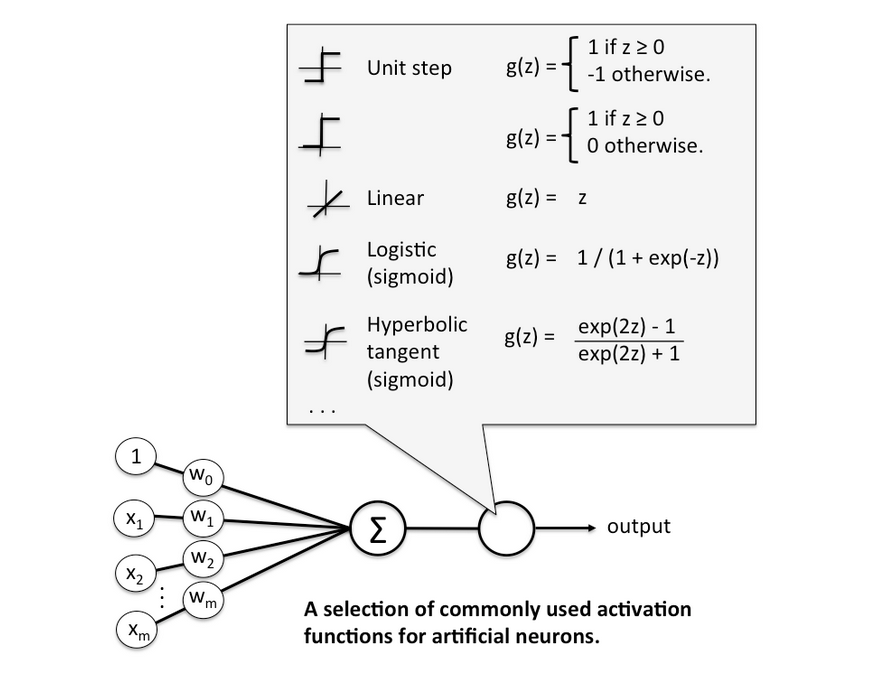



### A single perceptron can only be used to implement linearly separable functions. It takes both real and boolean inputs and associates a set of weights to them, along with a bias.

## Update Rule :
                                                     w(i,j)(new) = w(i,j)(old) + n (y_hat(j) - y(j))x(i)

         w(i,j)   ---> connection weight between i th input neuron and j th output neuron.
         x(i)     ---> is the i th input value of the current training instance.
         y_hat(j) ---> is the output of j th output neuron for the current training instance.
         y(j)     ---> is the j th target output of the j th output neuron for the current training instance.
         n        ---> is the learning rate.


In [ ]:
data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

## EDA

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data['Geography'].value_counts()

In [ ]:
data['EstimatedSalary'] = data['EstimatedSalary'].astype(int) ## EstimatedSalary col was in float converted into int datatype 

In [ ]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname','Geography'],inplace=True) ## no impact in the output

In [ ]:
data.head()

## LabelEncoder() helps to convert categorical variables into numeric form.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

## Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, feature-wise normalization such as MinMax Scaling is usually used.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## Perceptron Model Implementation

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron()

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

## Hyperparameter tuning using gridsearchcv

In [ ]:
param_dist = {
    'penalty' :['l2','l1','elasticnet',None],
    'alpha':[0.001,0.0001,0.00001],
    'max_iter':[10,100,1000,2000]
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=param_dist,cv=10)

In [ ]:
grid.fit(X_train,y_train)

## Best Estimator

In [ ]:
grid.best_estimator_

## Best Score

In [ ]:
grid.best_score_

In [ ]:
updated_clf = Perceptron(alpha=0.001, max_iter=10, penalty='l1')

In [ ]:
updated_clf.fit(X_train,y_train)

In [ ]:
updated_y_pred = updated_clf.predict(X_test)

## Accuracy

In [ ]:
accuracy_score(y_test,updated_y_pred)